## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd 
import missingno as mn

import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import warnings                       
warnings.filterwarnings("ignore")

## Importing data and creating a deep copy

In [2]:
videoGameData = pd.read_csv("vgsales.csv",index_col=0)

In [3]:
data = videoGameData.copy()

## Examining the Data

In [4]:
data.head()

Name Platform    Year         Genre Publisher  \
Rank                                                                      
1                   Wii Sports      Wii  2006.0        Sports  Nintendo   
2            Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37

In [5]:
data.shape

(16598, 10)

In [6]:
data.size

165980

In [7]:
data.describe()

Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


## Checking Duplicated values

In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(keep = 'first',inplace = True)

## Checking Null value

In [11]:
data.isnull().mean() * 100

Name            0.000000
Platform        0.000000
Year            1.626800
Genre           0.000000
Publisher       0.349461
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

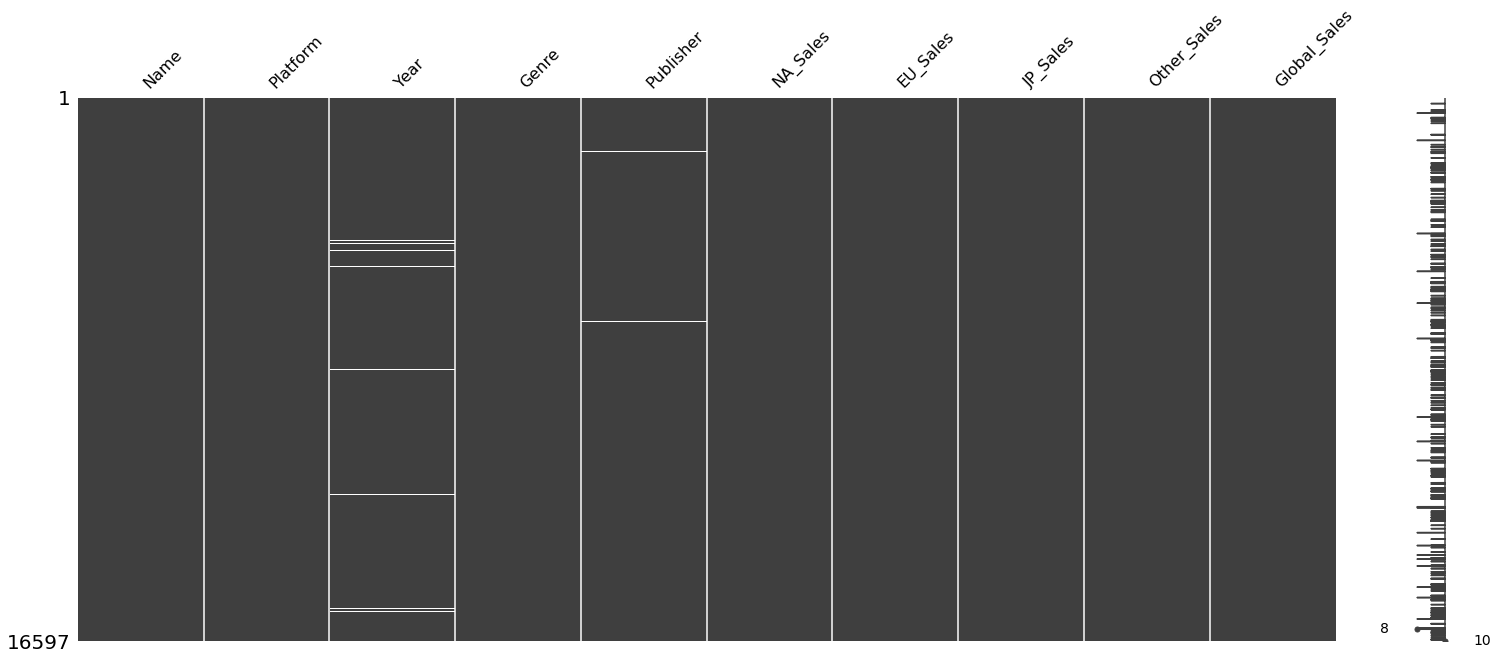

In [12]:
mn.matrix(data)

### We dont have much null values, so i would prefer dropping over synthesizing

In [13]:
data.dropna(inplace=True)

### Year Datatype should be integer

In [14]:
data['Year']=data['Year'].astype('int64')

# Exploratory Data Analysis 

## 1.Top Grossing Games

In [15]:
GamesRev = data.groupby('Name')['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().sort_values('Global_Sales',ascending = False)[:10]
GamesRev.drop('Global_Sales',axis=1,inplace=True)
fig = px.bar(GamesRev,
             labels={
                     "variable": "Region",
                     "value": "Sales(in Million)",
                     "Name": "Game"},
            title = 'Top Grossing Game in different Region')
fig.update_layout(
    title={'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.update
fig.show()

### Wii Sports was played the most with highest global sales followed by evergreen GTA V & Super Mario Bros

## 2.Region Wise Sales Distribution

In [16]:
region =['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
sales = [data[i].sum() for i in region]
fig = px.pie(names=region,values=sales)
fig.update_traces(rotation=90, pull=[0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.show()

### North America constitutes 49.1% of the global game sales

## 3.Top Grossing Publisher

In [17]:
publisher = data['Publisher'].value_counts()
publisher2 = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10].reset_index()
publisher = publisher.reindex(index=publisher2['Publisher'])
publisher2['Games Published'] = publisher.values[:10]
fig = px.bar(publisher2 , x =publisher2['Publisher'],y=publisher2['Global_Sales'],color=publisher2['Games Published'],
             labels={"Global_Sales": "Global Sales"},
            title = 'Top Grossing Publisher with number of Publications')
fig.update_layout(
    title={'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.show()

### Nintendo published 696 games constituing to their highest global sales 
### followed by Electronic Arts with most game publications i.e. 1339.

## 4. Top Publishers Top 10 Grossing Games 

In [18]:
topPublisher = publisher2['Publisher'][:5]
publisher = data.groupby(['Publisher'])
fig = go.Figure()
for pub in topPublisher:
    pubget = publisher.get_group(pub).groupby('Name')['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending = False)[:10]
    fig.add_trace(
    go.Bar(x=pubget['Name'],
            y=pubget['Global_Sales'],
           name=pub,
           visible= True if pub == 'Nintendo' else False,
          marker={'color': pubget['Global_Sales'],'colorscale': 'Portland'}))
    fig.update_layout(xaxis_title="Games",
    yaxis_title="Global Sales")
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.85,
            y=1.1,
            buttons=list([
                dict(label=topPublisher[0],
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 10 Games per Publisher"}]),
                dict(label=topPublisher[1],
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 10 Games per Publisher"}]),
                dict(label=topPublisher[2],
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 10 Games per Publisher"}]),
                dict(label=topPublisher[3],
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 10 Games per Publisher"}]),
                dict(label=topPublisher[4],
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 10 Games per Publisher"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 10 Games per Publisher",
     xaxis_domain=[0.05, 1.0],
    title={'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28),
    annotations=[
        dict(text="Publisher :", showarrow=False,
                             x=0.2, y=1.1, yref="paper", align="left")
    ]
)


fig.show()

## 5.Most Popular Genre

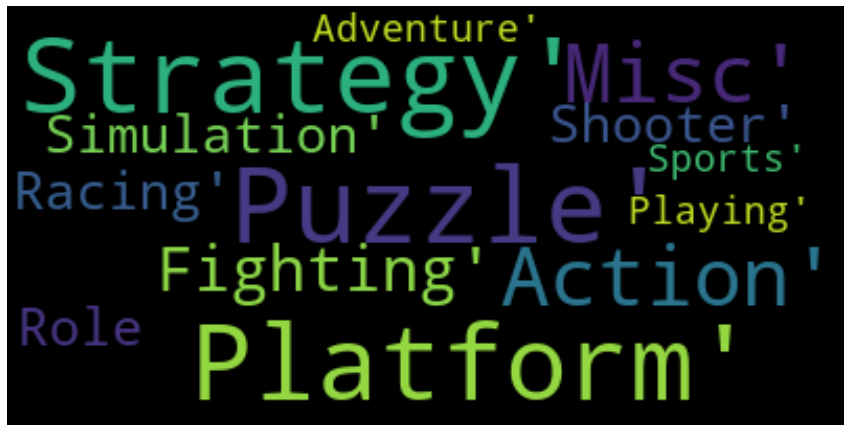

In [19]:
text = list(set(data['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
genre = data['Genre'].value_counts()
fig = px.pie(genre, values = genre.values , names=genre.index,title= "Genre Distribution")
fig.update_traces(textinfo="percent+label")
fig.update_layout(title={'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.show()

### Most Games published were of the ACTION genre followed by SPORTS and MISC

## 6.Top Grossing Genre

In [21]:
genreSales = data.groupby('Genre')['Global_Sales'].sum()
fig = px.bar(genreSales,orientation='h',labels={"value": "Global Sales","variable":"region"},title = 'Top Grossing Genre')
fig.update_layout(title={'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.show()

### ACTION Games are the highest grossers of all time followed by SPORTS and SHOOTER Games

## 7.Most Favourite Platform

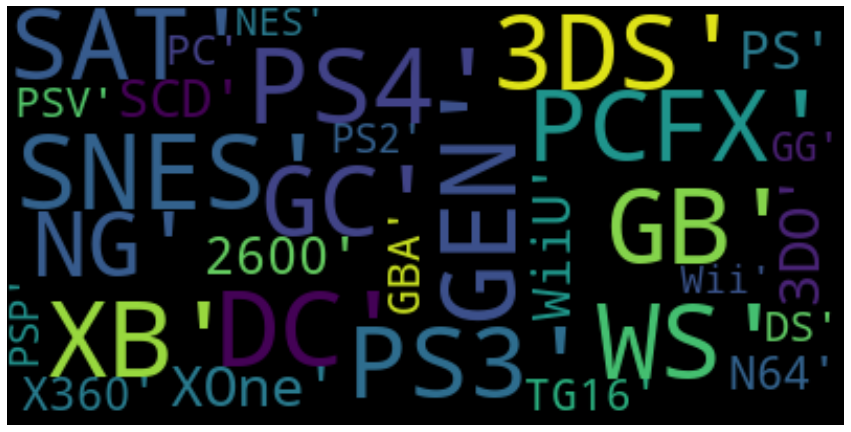

In [22]:
text = list(set(data['Platform']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
platform = data['Platform'].value_counts()[:10]
fig = px.pie(platform,names=platform.index,values=platform.values,hole=.3,title='Platform Distribution')
fig.update_traces(textinfo="percent+label",pull=[0.1,0.2,0.15,0.06,0.06,0.06,0.06,0.06,0.06,0.06])
fig.update_layout(title={'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.show()

### Mostly Games were published for DS , PS2 and PS3

## 8.Top Grossing Platform

In [24]:
platform = data.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()
platform = platform[(platform['Year']>=2006) & (platform['Year']<=2015)]
platform = platform.loc[platform['Platform'].isin(['DS', 'PS2', 'PS3', 'Wii', 'X360'])]
fig = px.bar(platform,x='Platform',y='Global_Sales',labels={"Global_Sales": "Global Sales"},
             title = 'Top Grossing Platform over 10 Years',animation_frame='Year', 
           animation_group='Platform', color='Platform')
fig.update_layout(title={'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.show()

## 9.Sales Distribution over Years

In [25]:
yearSales = data.groupby('Year')['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
fig = px.line(yearSales,title='Region-wise Sales Distribution over Years',
              labels={"value": "Sales(in Million)","variable":"Region"} )
fig.update_layout(title={'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.show()

### Video Game Sales witnessed Global High between 2006 to 2011

## 10.Sales relation with number of Game Published

In [26]:
year = data['Year'].value_counts()
year2 = data.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
year = year.reindex(index=year2['Year'])
year2['Games Published'] = year.values
fig = px.bar(year2 , x =year2['Year'],y=year2['Global_Sales'],color=year2['Games Published'],
             title='Sales Relation with Number of Game Published',labels={"Global_Sales":"Global Sales"})
fig.update_layout(title={'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    titlefont=dict(size =28))
fig.show()

### Video Game Industry witnessed a boom between 2006-2011 ,when more than 1000 games were published every year with Global Sales hitting all time high.